<div style="background: #000;
            color: #FFF;
            margin: 0px;
                padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Week 10 - Class 1 - 11/16</h1>
</div>

## Objectives for this week:
* Creating Models and Views
* Migration of a Database
* Creating Login Functionality and Forms
* Amazon s3

## Today's Objective:
* Logging
* More Flask Features (redirects, errors, responses, cookies, sessions)
* Databases
* SQL and Relational Databases
* SQLite3

<div style="background: #000;
            color: #FFF;
            margin: 0px;
                padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Week 9 Homework</h1>
</div>

# Exercise 1

Given a valid (IPv4) IP address, return a defanged version of that IP address.

A defanged IP address replaces every period "." with "[.]".

Example 1:
```
Input: address = "1.1.1.1"
Output: "1[.]1[.]1[.]1"
```
Example 2:
```
Input: address = "255.100.50.0"
Output: "255[.]100[.]50[.]0"
```

Bonus: Try completing it without using string methods and just looping through the string.

# Logging 

Logging is the act of recording events occuring as your application runs. This is important to be able to access important information about our application in case we need to debug or troubleshoot.

### Python's `logging`

Python's standard library includes a module called `logger`. `logger` contains for main sub-modules:
* loggers
* handlers
* filters
* formatters

Loggers - objects that handle our logging that the application's code will deal with. These are almost never instantiated directly. 

Handlers - object used to deal with logger events such as writing to file, filtering, formatting and error handling. Also not instantiated directly.

Filters - used by loggers and handlers to filter more than levels.

Formatters - handle the layout the log messages will be in.

Also LogRecord objects which are created by the logger every time something is logged.

Levels and  when to use:
* `DEBUG` - Detailed information, typically of interest only when diagnosing problems
* `INFO` - Confirmation that things are working as expected
* `WARNING` - An indication that something unexpected happened, or indicative of some problem in the near future (e.g. ‘disk space low’). The software is still working as expected.
* `ERROR` - Due to a more serious problem, the software has not been able to perform some function.
* `CRITICAL` - A serious error, indicating that the program itself may be unable to continue running.

You'll want to know the following attributes/methods:
* `logging.basicConfig()` - sets config
* `logging.getLogger()` - returns `Logger` object
* `logging.setHandler()` - sets handler instance for logging
* `logging.setLevel()` - sets minimum level to log
* `logging.debug()` - logs a debug message
* `logging.info()` - logs an info message
* `logging.warning()` - logs a warning message
* `logging.error()` - logs an error message
* `logging.critical()` - logs a critical message
* `logging.except()` - logs an exception
* `logging.log()` - 
* `logging.shutdown()`


https://docs.python.org/3/library/logging.html#module-logging

In [ ]:
import logging
logging.warning('Watch out!')  # will print a message to the console
logging.info('I told you so')  # will not print anything 

In [ ]:
# Logging to a file
import logging
logging.basicConfig(filename='example.log', level=logging.DEBUG)
logging.debug('This message should go to the log file')
logging.info('So should this')
logging.warning('And this, too')
logging.error('And non-ASCII stuff, too, like Øresund and Malmö')

In [ ]:
# setting up specific logger:
import logging 
FORMAT = '%(asctime)-15s %(clientip)s %(user)-8s %(message)s'
logging.basicConfig(format=FORMAT)
d = {'clientip': '192.168.0.1', 'user': 'fbloggs'}
logger = logging.getLogger('tcpserver')
logger.warning('Protocol problem: %s', 'connection reset', extra=d)


### How would we log our flask application

Easiest way would be to set a log file and then use `logger.<LEVEL>` to output messages to that log file.
example code using python's logger:

In [ ]:
from flask import Flask
import logging

app = Flask(__name__)


logging.basicConfig(filename='demo.log', level=logging.DEBUG)

@app.route("/")
def home():
    logging.debug("running home route")
    return render_template("home.html")


Flask includes a logger though:

In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route("/")
def home():
    app.logger.debug("running home route")
    return render_template("home.html")

In [ ]:
from flask import Flask

app = Flask(__name__)
app.logger.warning("hello")

# More Flask Features

### `redirects(location, code, resp)`

`redirect` is a function in the `flask` library that allows you to redirect to another route:

example:

In [ ]:
from flask import Flask, render_template, redirect, url_for

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('home.html')

@app.route('/login', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        # code to handle log in
        if user.logged_in:
            return redirect('/user')
        else:
            return redirect(url_for('home'), 302)
    else:
        return render_template('login.html')


@app.route('/user')
def user():
    user = get_user()
    return render_template('user.html', user=user)

### errors

We saw last week how to create routes for errors using the `@app.errorhandler` decorator or `app.register_error_handler`.

examples of creating our own view:

In [ ]:
from flask import Flask, render_template, request

app = Flask(__name__)

@app.errorhandler(404)
def not_found(e):
    return render_template("404.html", error=e)

In [ ]:
from flask import Flask, render_template, request

app = Flask(__name__)

def not_found(e):
    return render_template("404.html", error=e)
    
app.register_error_handler(404, not_found)

### `abort(status_code)`

We can also throw errors at any point to control what pages users see using the `abort` function from the `flask` library.

In [ ]:
from flask import Flask, render_template, abort

app = Flask(__name__)

@app.route('/')
def home():
    return render_template("home.html")
    
@app.route('/user')
def user():
    user = get_user()
    if user.logged_in:
        return render_template('user.html', user=user)
    else:
        abort(401) # error code for unauthenticated

### Using the `Response` object and `make_response`

`Response(response=None, status=None, headers=None, mimetype=None, content_type=None)`

We could import `Response` from `flask` and create a response using this to return in any of our routes/views. But most of the time, we'll instead use a function called `make_response` to do so.

In [ ]:
from flask import Flask, Response

app = Flask(__name__)

@app.route('/example')
def example():
    resp = Response("{'hello':'world'}", 200)
    resp.headers['Content-Type'] = 'application/json'
    return resp

In [ ]:
from flask import Flask, make_response

app = Flask(__name__)

@app.route('/example')
def example():
    resp = make_response(render_template('example.html'), 200)
    return resp

### cookies

In [ ]:
from flask import Flask, render_template

index_html = \
"""
   <html>
      <body>
         <form action = "/setcookie" method = "POST">
            <p><h3>Enter userID</h3></p>
            <p><input type='text' name = 'cookie'/></p>
            <p><input type='submit' value = 'Login'/></p>
         </form>
      </body>
   </html>
"""

cookie_html = \
"""
<html>
   <body>
      <a href="/getcookie">get cookie</a>
   </body>
</html>
"""

app = Flask(__name__)

@app.route('/')
def index():
    render_template('index.html')
    
@app.route('/setcookie', methods = ['POST', 'GET'])
def setcookie():
    if request.method == 'POST':
        user.request.form['cookie']
        resp = make_response(render_template('read'))
        resp.set_cookie('cookie', '1')
        return resp
    
@app.route('/getcookie')
def getcookie():
    val = request.cookies.get('cookie')
    return f'<h1>cookie value = {val}</h1>'

### sessions

Sessions, like cookies, allow us to maintain context between the client and the server. It does this by storing information in the user's browser.

In [ ]:
from flask import Flask, render_template

form_html = \
'''
   <form action = "" method = "post">
      <p><input type = text name = username/></p>
      <p<<input type = submit value = Login/></p>
   </form>
'''

not_logged_in_html = \
"""
You are not logged in 
<br>
<a href='/login'></b>click here to log in</b></a>
"""

logged_in_html = \
"""
Logged in as {{user }}
<br>
<b><a href = '/logout'>click here to log out</a></b>
"""



app = Flask(__name__)

@app.route('/')
def index():
    if 'username' in session:
        username = session['username']
        return render_template(logged_in_html, user=username)
    return not_logged_in_html
   
@app.route('/login', methods = ['GET', 'POST'])
def login():
   if request.method == 'POST':
      session['username'] = request.form['username']
      return redirect(url_for('index'))
   return form_html 
    
@app.route('/logout')
def logout():
    session.pop('username', None)
    return redirect(url_for('index'))

# Databases

A database is an organized collection of data, generally stored and accessed electronically from a computer system. Where databases are more complex they are often developed using formal design and modeling techniques.

The database management system (DBMS) is the software that interacts with end users, applications, and the database itself to capture and analyze the data. The DBMS software additionally encompasses the core facilities provided to administer the database. The sum total of the database, the DBMS and the associated applications can be referred to as a "database system". Often the term "database" is also used to loosely refer to any of the DBMS, the database system or an application associated with the database. 

[source](https://en.wikipedia.org/wiki/Database)

### SQL and Relational Databases

In the 1980's, relational databases became widely used in programming. 

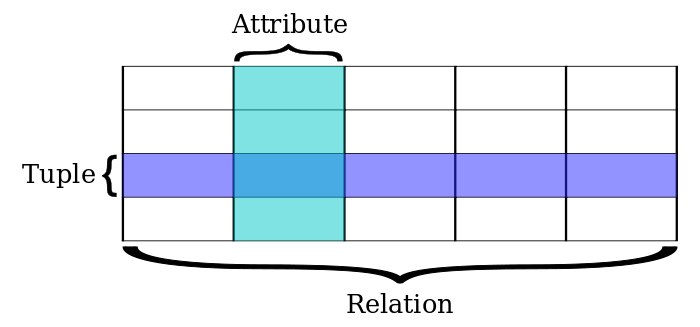
Key components of a relational database:
* tables - a set of data with specified columns and unspecified rows
* columns - a set of data values of a particular type
* rows - represents a single tuple of values
* keys - each row in a table has it's own unique key for ID called 'primary key'

real world example:

    table - users
    columns  - user.name, user.email or user.dob
    row - (user1.name, user1.email, user1.dob)
    keys - user1 would have a unique primary key for identification
    
Tables can be connected to each other using foreign keys to connect rows from one table to rows of another table. Each piece of data in the datebase has a relation to another.

### Queries

There are a number of operations that you can do against a relational database. This might be familiar to your.

* Unions
* Intersections
* Differences
* Selections
* Cartesian Product


### Examples of RDMS:
* SQLite - open source and widely available
* PostgreSQL - open source
* MySQL - closed source but free 

# SQL 

SQL is a domain-specific language can be considered as a standard for relationship databases. All of the previous examples follow this standard.

Examples of SQL:

`SELECT` retrieves data from a table

```SQL
SELECT *
 FROM  Book
 WHERE price > 100.00
 ORDER BY title;
```

`INSERT` adds rows to tables

```SQL
INSERT INTO example
 (column1, column2, column3)
 VALUES
 ('test', 'N', NULL);
```

`UPDATE` modifies a set of existing table rows
```SQL
UPDATE example
 SET column1 = 'updated value'
 WHERE column2 = 'N';
 ```
 
 `DELETE` removes existing rows from a table
 
 ```SQL
 DELETE FROM example
 WHERE column2 = 'N';
 ```
 
 Example of creating a table in SQL:
 ```SQL
 CREATE TABLE example(
 column1 INTEGER,
 column2 VARCHAR(50),
 column3 DATE NOT NULL,
 PRIMARY KEY (column1, column2)
);
 ```
 
SQL Data Types
 
`CHAR` - n-character string  
`VARCHAR` - variable-width string with max size of n  
`CLOB` - character large object  
`NCHAR` - fixed with string supporting international character set  
`BINARY` - fixed with binary string  
`VARBINARY` - variable-width binary string with max size of n  
`BLOB` - binary large object  
`BOOLEAN` - boolean  
`INTEGER` - integer  
`FLOAT` - float  
`DATE` - e.g. 2011-05-03  
`TIME` - e.g. 15:51:36  
`TIMESTAMP` - `DATE` AND `TIME` put together  

# SQLite3

SQLite3 comes with python (and most operating systems in general). It's one of the most commonly used databases because of it's small size and availability.

It also doesn't require much overhead, storing the db contents in .sql and only requiring the SQLite3 library (written in C) to use. All web browsers contain SQLite3 to be used to store information. For example, you could access your firefox browser's SQLite database for your browsing history.